In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2024-04-21 20:24:39.222744: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 20:24:39.222860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 20:24:39.357368: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
Train = "/kaggle/input/medicinal-plant-bijly-withbg/Medicinal Plant-Bijly-withBG/Train"
Validation = "/kaggle/input/medicinal-plant-bijly-withbg/Medicinal Plant-Bijly-withBG/Validation"
Test = "/kaggle/input/medicinal-plant-bijly-withbg/Medicinal Plant-Bijly-withBG/Test"

In [3]:
# Load the training dataset using TensorFlow's image_dataset_from_directory function
training_set = tf.keras.utils.image_dataset_from_directory(
    Train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3500 files belonging to 10 classes.


In [4]:
# Load the training dataset using TensorFlow's image_dataset_from_directory function
Validation_set = tf.keras.utils.image_dataset_from_directory(
    Validation,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 500 files belonging to 10 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [19]:
# cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [20]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
training_history = cnn.fit(x=training_set,validation_data=Validation_set,epochs=10)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9518 - loss: 0.1436 - val_accuracy: 0.7560 - val_loss: 1.0047
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9328 - loss: 0.2252 - val_accuracy: 0.7140 - val_loss: 1.4276
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.9765 - loss: 0.0664 - val_accuracy: 0.7400 - val_loss: 1.2237
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.9791 - loss: 0.0725 - val_accuracy: 0.7300 - val_loss: 1.2935
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.9564 - loss: 0.1276 - val_accuracy: 0.7320 - val_loss: 1.1569
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9667 - loss: 0.1065 - val_accuracy: 0.7880 - val_loss: 0.8478
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.9876 - loss: 0.0379 - val_accuracy: 0.7400 - val_loss: 1.3376
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9902 - loss: 0.0344 - val_accu

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

110/110 ━━━━━━━━━━━━━━━━━━━━ 117s 985ms/step - accuracy: 0.9996 - loss: 0.0015
Training accuracy: 0.9997143149375916


In [25]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(Validation_set)
print('Validation accuracy:', val_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 449ms/step - accuracy: 0.7682 - loss: 1.2793
Validation accuracy: 0.7599999904632568


In [27]:
cnn.save('trained_medical_plant_model.keras')

In [28]:
cnn.save('trained_medical_plant_model.h5')

In [30]:
 #Return Dictionary of history
training_history.history

{'accuracy': [0.9562857151031494,
  0.9599999785423279,
  0.972000002861023,
  0.9814285635948181,
  0.9622856974601746,
  0.9728571176528931,
  0.9897142648696899,
  0.9871428608894348,
  0.9725714325904846,
  0.998285710811615],
 'loss': [0.13169676065444946,
  0.13758666813373566,
  0.08178374171257019,
  0.06443068385124207,
  0.11323733627796173,
  0.08324313908815384,
  0.03221923112869263,
  0.044128935784101486,
  0.088208869099617,
  0.008019860833883286],
 'val_accuracy': [0.7559999823570251,
  0.7139999866485596,
  0.7400000095367432,
  0.7300000190734863,
  0.7319999933242798,
  0.7879999876022339,
  0.7400000095367432,
  0.7360000014305115,
  0.7519999742507935,
  0.7599999904632568],
 'val_loss': [1.004655361175537,
  1.4275786876678467,
  1.22366464138031,
  1.2935274839401245,
  1.1569311618804932,
  0.8478337526321411,
  1.3376089334487915,
  1.4468978643417358,
  1.2004808187484741,
  1.2204896211624146]}

In [31]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [32]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


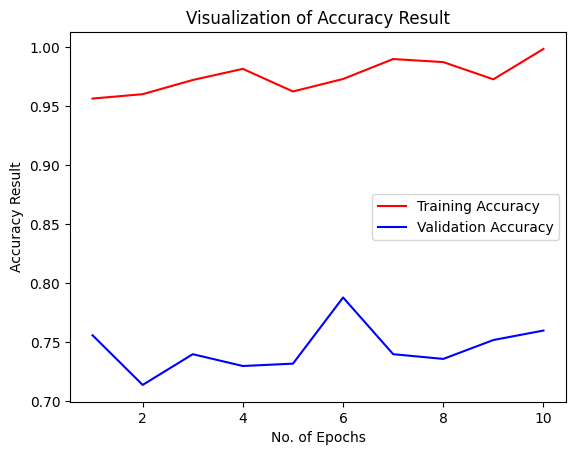

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [34]:
class_name = Validation_set.class_names
class_name

['Bohera',
 'Devilbackbone',
 'Haritoki',
 'Lemongrass',
 'Nayontara',
 'Neem',
 'Pathorkuchi',
 'Thankuni',
 'Tulsi',
 'Zenora']

In [35]:
# Load the training dataset using TensorFlow's image_dataset_from_directory function
test_set = tf.keras.utils.image_dataset_from_directory(
    Test,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1000 files belonging to 10 classes.


In [37]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step


In [38]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [39]:
Y_true

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    

In [40]:
predicted_categories

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 3,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 7, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 1, 7, 4, 4,
       4, 4, 1, 4, 8, 4, 1, 1, 2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 6,
       6, 8, 7, 8, 8, 8, 8, 2, 1, 2, 4, 1, 1, 1, 4, 1, 4, 1, 2, 1, 4, 4,
       4, 1, 1, 4, 6, 6, 1, 8, 8, 4, 1, 4, 4, 1, 2, 1, 1, 4, 4, 4, 1, 1,
       4, 8, 8, 4, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 8, 8, 8,
       8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8,
       8, 4, 4, 8, 8, 4, 8, 8, 4, 5, 5, 5, 5, 5, 8, 5, 5, 5, 8, 8, 8, 8,
       8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
    

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [42]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

               precision    recall  f1-score   support

       Bohera       0.99      0.91      0.95       100
Devilbackbone       0.66      0.48      0.55       100
     Haritoki       0.35      0.13      0.19       100
   Lemongrass       0.99      0.98      0.98       100
    Nayontara       0.64      0.82      0.72       100
         Neem       0.92      0.98      0.95       100
  Pathorkuchi       0.96      0.99      0.98       100
     Thankuni       0.86      0.65      0.74       100
        Tulsi       0.49      0.90      0.64       100
       Zenora       0.94      0.96      0.95       100

     accuracy                           0.78      1000
    macro avg       0.78      0.78      0.76      1000
 weighted avg       0.78      0.78      0.76      1000



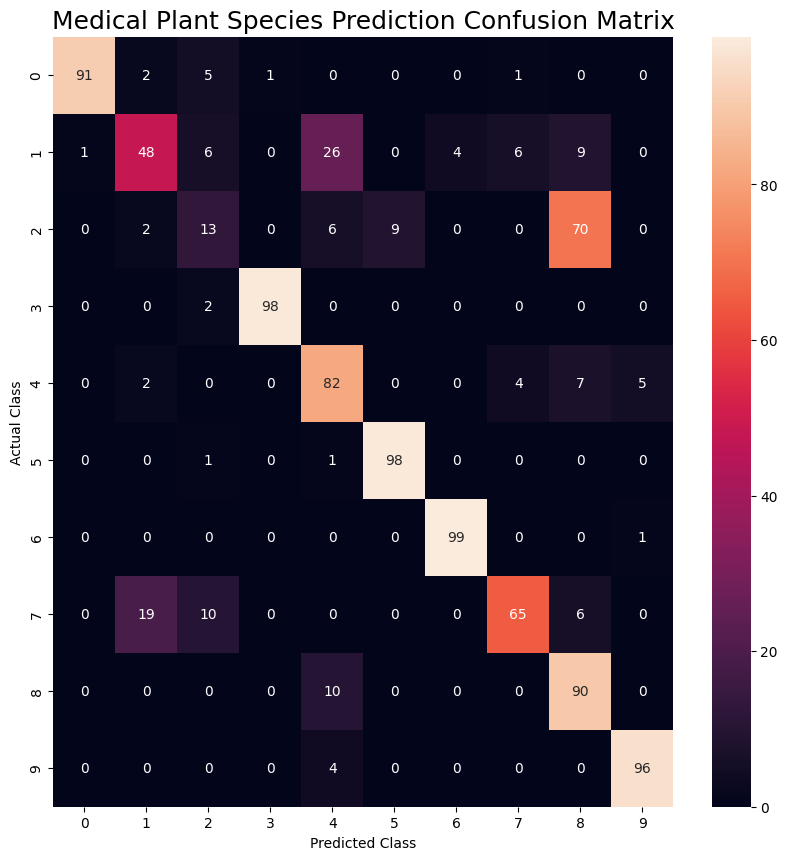

In [49]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Medical Plant Species Prediction Confusion Matrix',fontsize = 18)
plt.show()

In [50]:
cnn.save('last_medical_plant_model.h5')

***GradCAM***

In [1]:
import numpy as np
import os
import cv2

import tensorflow as tf
# from google.colab.patches import cv2_imshow

2024-04-22 07:43:06.871300: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:43:06.871449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:43:07.114786: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [60]:
Validation = Validation

In [62]:
image = cv2.imread('Medicinal Plant-Bijly-1-noBG/Validation/Neem/01.png')
if image is None:
    print("Error: Unable to load image")
else:
    print("Image loaded successfully")

print(type(image))

# For TensorFlow models, you might not need to transpose the image dimensions
# image_preprocessed = image_normalized

# Display the preprocessed image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Error: Unable to load image
<class 'NoneType'>


[ WARN:0@210.394] global loadsave.cpp:248 findDecoder imread_('Medicinal Plant-Bijly-1-noBG/Validation/Neem/01.png'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1338: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'
